# Project Dota Set

In this project, I will study my data of the game Dota 2 (which is my preferred). It is been a while since I play this game but I never had looked into my match history to see how my playing is, I will now do this and share the results with you!

Dota stands for Defense Of The Ancients, here is a brief description of the game: 'Dota 2 is a multiplayer online battle arena (MOBA) video game in which two teams of five players compete to collectively destroy a large structure defended by the opposing team known as the "Ancient", whilst defending their own.' For more information, you can look at this [link](https://en.wikipedia.org/wiki/Dota_2).

This study is divided in four main subjects:
<ul>
<li><a href = "#gather">Gathering;</a></li>
<li><a href = "#assess">Assessing;</a></li>
<li><a href = "#clean">Cleaning;</a></li>
<li><a href = "#eda">Exploratory Data Analysis.</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
from IPython.display import Image
%matplotlib inline

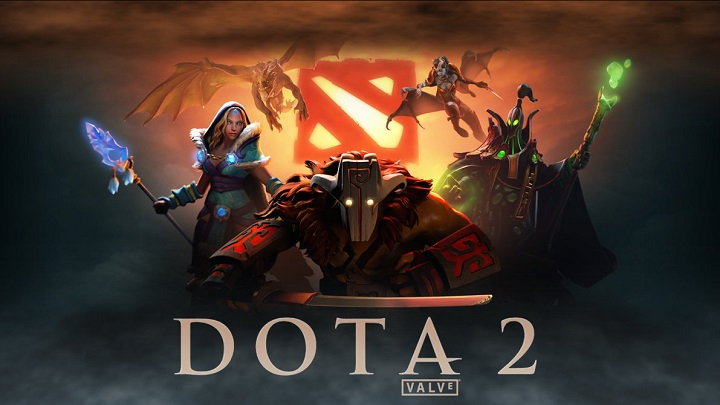

In [2]:
Image(r'D:\Guilherme\Cursos\Programação\Curso Cientista de Dados - Udemy\5º Projeto\Projeto\dota2.jpg')

<a id = "gather"></a>
## Gather

For the gathering part, I tried to get the data thru the Dota 2 API but I haven't a success. To not delay the delivery of this project I went to Steam's website and downloaded my matches history to a .csv file. It is divided into two files, one is more complete than the other, so I kept then separated.

In [3]:
path = r'D:\Guilherme\Cursos\Programação\Curso Cientista de Dados - Udemy\5º Projeto\Projeto\dota2data.csv'

dota_df = pd.read_csv(path,sep = ';', encoding = 'latin1')

In [4]:
path2 = r'D:\Guilherme\Cursos\Programação\Curso Cientista de Dados - Udemy\5º Projeto\Projeto\dota2data_2.csv'

dota_df2 = pd.read_csv(path2,sep = ';', encoding = 'latin1')

<a id = 'assess'></a>
## Assessing

Let's use the method 'set_option() so we can see all the columns in both data frames.

In [5]:
pd.set_option('display.max_columns', 80)

In [6]:
dota_df.head()

MatchID  Duration                StartTime  LeagueID  GameMode  \
0  5482821199  00:40:39  2020-06-23 01:09:44 GMT         0        23   
1  5482819562  00:02:08  2020-06-23 01:06:59 GMT         0        23   
2  5482726054  00:19:43  2020-06-22 22:09:39 GMT         0        23   
3  5482696084  00:37:43  2020-06-22 21:26:47 GMT         0        23   
4  5482674016  00:23:21  2020-06-22 20:59:09 GMT         0        23   

   MatchOutcome  PlayerSlot  Party               Hero                 Item1  \
0             3           1      1       Witch Doctor      Cetro de Aghanim   
1            65        -126      7      Bounty Hunter      Anel de Proteção   
2             2           3      3               Lion         Botas Serenas   
3             3           2      1  Centaur Warrunner  Coração do Tarrasque   
4             3           1      1             Clinkz       Lança Dracônica   

                 Item2                    Item3                 Item4  \
0  Cetro Divino de Eul  Bastão Preto da Realeza       Cajado de Força   
1     Poção de Clareza                    Tango                   NaN   
2         Talismã Nulo         Cetro de Aghanim                   NaN   
3    Proteção Carmesim  Bastão Preto da Realeza  Coração do Tarrasque   
4    Martelo de Mítrio         Tiara Assombrada     Pedra Enferrujada   

                  Item5              Item6                 Item7 Item8  \
0       Capa Cintilante      Botas Arcanas  Sentinela Reveladora   NaN   
1                   NaN                NaN                   NaN   NaN   
2      Véu da Discórdia                NaN                   NaN   NaN   
3       Cota de Lâminas         Resplendor         Botas Serenas   NaN   
4  Orquídea Malevolente  Coturnos do Poder                 Tango   NaN   

              Item9             Item10  Level  Kills  Deaths  Assists  \
0               NaN        Anel Arcano     30     11       7       14   
1               NaN                NaN      1      0       0        0   
2               NaN    Pá de Confiança     23      3       7       14   
3  Anel de Proteção    Espada Paladina     30     13       8       25   
4               NaN  Presas Vampíricas     25      2       9        4   

   LastHits  Denies  GoldPerMin  XPPerMin Solo Queue Uncalibrated  \
0        64       3         682      1410        Sim          Não   
1         0       0           0         0        Sim          Não   
2        19       0         598      1265        Sim          Não   
3       148       2        1079      1430        Sim          Não   
4        47       2         434      1260        Sim          Não   

  Low Priority New Player Battle Pass Seasonal Rank Plus  AssignedRole  \
0          Não        Não         Não           Não  Não             0   
1          Não        Não         Não           Não  Não             0   
2          Não        Não         Não           Não  Não             0   
3          Não        Não         Não           Não  Não             0   
4          Não        Não         Não           Não  Não             0   

   NetWorth  
0     22320  
1       380  
2     10621  
3    -31763  
4      9881

In [7]:
dota_df.tail()

MatchID  Duration                StartTime  LeagueID  GameMode  \
1861  2499574319  00:37:39  2016-07-12 14:08:29 GMT         0         1   
1862  2499565277  00:00:00  2016-07-12 14:04:34 GMT         0         1   
1863  2498457356  00:31:03  2016-07-12 03:06:03 GMT         0         1   
1864  2498070270  00:50:20  2016-07-11 20:22:50 GMT         0         1   
1865  2489279107  00:52:37  2016-07-08 03:15:06 GMT         0         1   

      MatchOutcome  PlayerSlot  Party            Hero              Item1  \
1861             3        -128      0      Juggernaut  Escudo Desgastado   
1862             3        -127      0      Juggernaut  Escudo Desgastado   
1863             2           0      0  Phantom Lancer  Coturnos do Poder   
1864             2           0      0  Phantom Lancer  Coturnos do Poder   
1865             3           1      0            Lina      Botas de Fase   

                      Item2           Item3                Item4  \
1861             Braçadeira   Botas de Fase     Cetro de Aghanim   
1862        Bálsamo de Cura             NaN                  NaN   
1863       Machado Ilusório  Anel de Áquila                  NaN   
1864         Anel de Áquila   Sange e Yasha      Lâmina Difusora   
1865  Tambor de Resistência           Tango  Cetro Divino de Eul   

                    Item5             Item6 Item7 Item8 Item9 Item10  Level  \
1861  Oferenda de Vladmir      Perseverança   NaN   NaN   NaN    NaN     16   
1862                  NaN               NaN   NaN   NaN   NaN    NaN      1   
1863                  NaN               NaN   NaN   NaN   NaN    NaN     14   
1864           Resplendor  Machado Ilusório   NaN   NaN   NaN    NaN     22   
1865   Armadura de Placas   Núcleo Octarina   NaN   NaN   NaN    NaN     20   

      Kills  Deaths  Assists  LastHits  Denies  GoldPerMin  XPPerMin  \
1861      4       2        3       135       0         391       362   
1862      0       0        0         0       0        1799         0   
1863      5       5       13        70       0         385       346   
1864     12       5        7       206       0         447       511   
1865      3      11        2       224       0         338       398   

     Solo Queue Uncalibrated Low Priority New Player Battle Pass  \
1861        Não          Não          Não        Não         Não   
1862        Não          Não          Não        Não         Não   
1863        Não          Não          Não        Não         Não   
1864        Não          Não          Não        Não         Não   
1865        Não          Não          Não        Não         Não   

     Seasonal Rank Plus  AssignedRole  NetWorth  
1861           Não  Não             0     14631  
1862           Não  Não             0       626  
1863           Não  Não             0     11085  
1864           Não  Não             0     21406  
1865           Não  Não             0     15322

In [8]:
dota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MatchID        1866 non-null   int64 
 1   Duration       1866 non-null   object
 2   StartTime      1866 non-null   object
 3   LeagueID       1866 non-null   int64 
 4   GameMode       1866 non-null   int64 
 5   MatchOutcome   1866 non-null   int64 
 6   PlayerSlot     1866 non-null   int64 
 7   Party          1866 non-null   int64 
 8   Hero           1866 non-null   object
 9   Item1          1745 non-null   object
 10  Item2          1719 non-null   object
 11  Item3          1719 non-null   object
 12  Item4          1586 non-null   object
 13  Item5          1524 non-null   object
 14  Item6          1376 non-null   object
 15  Item7          519 non-null    object
 16  Item8          279 non-null    object
 17  Item9          177 non-null    object
 18  Item10         329 non-null 

In [9]:
dota_df.describe()

MatchID  LeagueID     GameMode  MatchOutcome  PlayerSlot  \
count  1.866000e+03    1866.0  1866.000000   1866.000000  1866.00000   
mean   4.320138e+09       0.0    21.872990      5.432476   -38.22776   
std    7.641178e+08       0.0     4.403563     13.419125    58.70086   
min    2.489279e+09       0.0     1.000000      2.000000  -128.00000   
25%    3.695704e+09       0.0    23.000000      2.000000  -124.00000   
50%    4.042357e+09       0.0    23.000000      2.000000     0.00000   
75%    5.102512e+09       0.0    23.000000      3.000000     1.00000   
max    5.482821e+09       0.0    23.000000     65.000000     5.00000   

             Party        Level        Kills       Deaths      Assists  \
count  1866.000000  1866.000000  1866.000000  1866.000000  1866.000000   
mean      2.269561    21.802787     8.562701     4.665059     8.976956   
std       2.692001     7.448822     8.482853     3.596369     6.496855   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    22.000000     2.000000     2.000000     4.000000   
50%       1.000000    25.000000     6.000000     4.000000     8.000000   
75%       4.000000    25.000000    12.000000     7.000000    13.000000   
max       9.000000    30.000000    68.000000    18.000000    41.000000   

          LastHits       Denies    GoldPerMin      XPPerMin  AssignedRole  \
count  1866.000000  1866.000000   1866.000000   1866.000000        1866.0   
mean     64.803323     2.036977    698.281886   1243.949625           0.0   
std      65.433014     2.557693   4883.058035   1404.247213           0.0   
min       0.000000     0.000000 -32673.000000      0.000000           0.0   
25%      26.000000     0.000000    440.250000    721.750000           0.0   
50%      50.000000     1.000000    757.000000   1260.000000           0.0   
75%      86.000000     3.000000   1153.000000   1525.500000           0.0   
max     708.000000    20.000000  31560.000000  28545.000000           0.0   

           NetWorth  
count   1866.000000  
mean    8405.224544  
std    16657.170689  
min   -32754.000000  
25%      972.000000  
50%    12823.500000  
75%    19776.000000  
max    32687.000000

Just for understanding 'sim' = yes and 'não' = no, I will not translate this now because I want to see if some columns bring some useful information first.

In [10]:
dota_df.groupby('Uncalibrated')['Uncalibrated'].count()

Uncalibrated
Não    1849
Sim      17
Name: Uncalibrated, dtype: int64

In [11]:
dota_df.groupby('Low Priority')['Low Priority'].count()

Low Priority
Não    1866
Name: Low Priority, dtype: int64

In [12]:
dota_df.groupby('New Player')['New Player'].count()

New Player
Não    1627
Sim     239
Name: New Player, dtype: int64

In [13]:
dota_df.groupby('Battle Pass')['Battle Pass'].count()

Battle Pass
Não    1797
Sim      69
Name: Battle Pass, dtype: int64

In [14]:
dota_df.groupby('Seasonal Rank')['Seasonal Rank'].count()

Seasonal Rank
Não    1866
Name: Seasonal Rank, dtype: int64

In [15]:
dota_df.groupby('Plus')['Plus'].count()

Plus
Não    1866
Name: Plus, dtype: int64

In [16]:
dota_df.groupby('AssignedRole')['AssignedRole'].count()

AssignedRole
0    1866
Name: AssignedRole, dtype: int64

In [17]:
dota_df.groupby('GameMode')['GameMode'].count()

GameMode
1       60
4       22
5        3
18       1
19      19
20       2
21       5
22     214
23    1540
Name: GameMode, dtype: int64

In [18]:
dota_df.query('GameMode == 19')

MatchID  Duration                StartTime  LeagueID  GameMode  \
723   4304380939  00:10:24  2018-12-31 01:32:59 GMT         0        19   
724   4304362423  00:14:55  2018-12-31 01:12:43 GMT         0        19   
725   4304343233  00:16:10  2018-12-31 00:51:25 GMT         0        19   
726   4304320040  00:21:56  2018-12-31 00:24:37 GMT         0        19   
727   4304284020  00:27:45  2018-12-30 23:43:55 GMT         0        19   
728   4304267750  00:15:01  2018-12-30 23:26:05 GMT         0        19   
741   4299855869  00:13:35  2018-12-28 22:24:59 GMT         0        19   
742   4299628136  00:15:01  2018-12-28 19:21:25 GMT         0        19   
743   4299591418  00:20:50  2018-12-28 18:56:38 GMT         0        19   
746   4295813878  00:21:51  2018-12-26 22:39:20 GMT         0        19   
747   4295636815  00:14:52  2018-12-26 20:05:49 GMT         0        19   
748   4295602010  00:17:46  2018-12-26 19:40:42 GMT         0        19   
749   4295571849  00:15:38  2018-12-26 19:19:51 GMT         0        19   
750   4295459275  00:27:35  2018-12-26 18:08:21 GMT         0        19   
751   4295421800  00:18:16  2018-12-26 17:46:52 GMT         0        19   
752   4295364954  00:24:38  2018-12-26 17:16:25 GMT         0        19   
753   4295291850  00:32:55  2018-12-26 16:37:07 GMT         0        19   
754   4295228725  00:26:08  2018-12-26 16:02:39 GMT         0        19   
1532  3618345774  00:16:02  2017-12-14 23:18:26 GMT         0        19   

      MatchOutcome  PlayerSlot  Party                 Hero              Item1  \
723              3           1      1                 Puck       Talismã Nulo   
724              3           0      0  Keeper of the Light      Botas Serenas   
725              3           4      3  Keeper of the Light      Botas Serenas   
726              3           2      1                 Puck       Talismã Nulo   
727              3           4      4                 Puck       Yasha e Kaya   
728              3           1      1        Troll Warlord     Escudo Robusto   
741              3           3      3               Magnus         Braçadeira   
742              3           0      0               Magnus     Escudo Robusto   
743              3           0      0    Centaur Warrunner  Proteção Carmesim   
746              3           0      0          Earthshaker         Braçadeira   
747              3           0      0  Keeper of the Light      Botas Serenas   
748              3           0      0                 Luna   Anel de Proteção   
749              3           4      4               Weaver              Tiara   
750              3           3      1  Keeper of the Light      Botas Serenas   
751              3           3      1               Clinkz    Anel de Basílio   
752              3           4      2  Keeper of the Light      Botas Serenas   
753              3           3      2            Pangolier   Fúria de Batalha   
754              3           1      1  Keeper of the Light   Cetro de Aghanim   
1532             2           5      4      Vengeful Spirit                NaN   

                     Item2                 Item3                 Item4  \
723         Pedra do Vazio           Fita Eólica                   NaN   
724                Mekansm         Lente do Éter  Cajado da Feitiçaria   
725          Lente do Éter               Mekansm                   NaN   
726    Cetro Divino de Eul      Esfera de Linken                   NaN   
727                    NaN   Cetro Divino de Eul      Esfera de Linken   
728                  Tango         Botas de Fase              Satânico   
741      Coturnos do Poder   Cetro Divino de Eul    Máscara da Loucura   
742      Coturnos do Poder    Máscara da Loucura            Devastador   
743          Botas Serenas  Coração do Tarrasque                   NaN   
746       Cetro de Aghanim         Botas Arcanas     Anel do Tarrasque   
747          Lente do Éter  Lâmina da Alacridade  Cajado da Feitiçaria   

In [19]:
dota_df.groupby('MatchOutcome')['MatchOutcome'].count()

MatchOutcome
2     1040
3      736
64       1
65      89
Name: MatchOutcome, dtype: int64

In [20]:
dota_df.groupby('Duration')['Duration'].count()

Duration
00:00:00    65
00:00:07     1
00:00:09     1
00:00:15     2
00:00:17     1
            ..
01:08:17     1
01:08:54     1
01:11:19     1
01:13:55     1
01:23:32     1
Name: Duration, Length: 1168, dtype: int64

In [21]:
dota_df2.head()

MatchID  HeroDamage  TowerDamage  HeroHealing  GoldSpent  \
0  5482821199       26368          976         9120      19595   
1  5482819562           0            0            0        290   
2  5482726054        8006          719            0       9580   
3  5482696084       37842         9736            0      28460   
4  5482674016       18640          540            0      10620   

   ScaledHeroDamage  ScaledTowerDamage  ScaledHeroHealing  Gold  \
0             11915                745               3068  5605   
1                 0                  0                  0     0   
2              5373                381                  0  2821   
3             18254               4112                  0  7258   
4              9462                417                  0   116   

              TimeLastSeen      PartyID  ClaimedFarmGold  SupportGold  \
0                        0  2,67237E+16             5096         2485   
1  1970-01-01 00:00:01 GMT  2,67237E+16                0            0   
2                        0  2,67237E+16             1702         1060   
3                        0  2,67237E+16             8025          835   
4                        0  2,67237E+16             3272          375   

   ClaimedDenies  ClaimedMisses  Misses             Ability1  \
0              0             24      18    Casco Paralisante   
1              0              0       0                  NaN   
2              0             15       6     Espinho de Terra   
3              0             29       9                Pisão   
4              0             11      17  Flechas Flamejantes   

           Ability2             Ability3            Ability4  \
0        Amaldiçoar           Amaldiçoar   Casco Paralisante   
1               NaN                  NaN                 NaN   
2  Drenagem de Mana     Espinho de Terra    Drenagem de Mana   
3        Retaliação   Arma de Dois Gumes          Retaliação   
4    Pacto de Morte  Flechas Flamejantes  Andar do Esqueleto   

              Ability5            Ability6             Ability7  \
0           Amaldiçoar  Sentinela da Morte           Amaldiçoar   
1                  NaN                 NaN                  NaN   
2     Espinho de Terra       Dedo da Morte           Enfeitiçar   
3           Retaliação           Debandada           Retaliação   
4  Flechas Flamejantes    Exército Ardente  Flechas Flamejantes   

             Ability8            Ability9           Ability10  \
0   Casco Paralisante   Casco Paralisante  +{s:value} de dano   
1                 NaN                 NaN                 NaN   
2    Drenagem de Mana    Espinho de Terra    Drenagem de Mana   
3  Arma de Dois Gumes  Arma de Dois Gumes  Arma de Dois Gumes   
4  Andar do Esqueleto      Pacto de Morte  Andar do Esqueleto   

            Ability11           Ability12                     Ability13  \
0    Vudu Restaurador  Sentinela da Morte              Vudu Restaurador   
1                 NaN                 NaN                           NaN   
2          Enfeitiçar       Dedo da Morte  +{s:value} de alcance de uso   
3               Pisão               Pisão                         Pisão   
4  Andar do Esqueleto    Exército Ardente       +{s:value} de Agilidade   

                           Ability14  \
0                   Vudu Restaurador   
1                                NaN   
2                         Enfeitiçar   
3  +{s:value} de regeneração de vida   
4                     Pacto de Morte   

                                     Ability15  \
0     +{s:value} saltos para Casco Paralisante   
1                                          NaN   
2        +{s:value} de dano para Dedo da Morte   
3                                    Debandada   
4  +{s:value} de dano para Flechas Flamejantes   

                                           Ability16           Ability17  \
0                                   Vudu Restaurador  Sentinela da Morte   
1                                                NaN      

In [22]:
dota_df2.tail()

MatchID  HeroDamage  TowerDamage  HeroHealing  GoldSpent  \
366  5358284943       20931         4016            0      17920   
367  5358253728       16111           24            0      10450   
368  5358222083       10780            0            0       5100   
369  5358181914        7742         1407            0      10670   
370  5358154694       27061         9202            0      28225   

     ScaledHeroDamage  ScaledTowerDamage  ScaledHeroHealing  Gold  \
366             11082               2218                  0  1176   
367              8491                 24                  0  2548   
368              5847                  0                  0   119   
369              6854                754                  0  2853   
370             18468               5010                  0    -1   

    TimeLastSeen      PartyID  ClaimedFarmGold  SupportGold  ClaimedDenies  \
366            0  2,66251E+16             1988          375              1   
367            0  2,66251E+16             1578          975              1   
368            0  2,66251E+16             2592          150              5   
369            0  2,66251E+16             1585            0              0   
370            0            0             2582            0              0   

     ClaimedMisses  Misses           Ability1           Ability2  \
366             10      11       Congelamento        Aura Arcana   
367              6      10       Congelamento        Aura Arcana   
368             39       2   Ritual de Sangue     Sede de Sangue   
369              4       4    Adaga Sufocante    Ataque Fantasma   
370             18       3  Maestria do Jingu  Pancada Ilimitada   

              Ability3             Ability4             Ability5  \
366        Aura Arcana         Congelamento  Explosão Cristalina   
367        Aura Arcana  Explosão Cristalina          Aura Arcana   
368   Ritual de Sangue       Sede de Sangue     Fúria por Sangue   
369    Adaga Sufocante             Ofuscada             Ofuscada   
370  Pancada Ilimitada    Maestria do Jingu      Dança da Árvore   

              Ability6           Ability7           Ability8  \
366   Campo Congelante        Aura Arcana        Aura Arcana   
367   Campo Congelante        Aura Arcana       Congelamento   
368            Ruptura     Sede de Sangue     Sede de Sangue   
369      Coup de Grace    Adaga Sufocante           Ofuscada   
370  Comando de Wukong  Maestria do Jingu  Maestria do Jingu   

              Ability9                           Ability10          Ability11  \
366       Congelamento                        Congelamento   Campo Congelante   
367       Congelamento                        Congelamento   Campo Congelante   
368   Ritual de Sangue  +{s:value} de velocidade de ataque   Ritual de Sangue   
369    Adaga Sufocante                            Ofuscada    Ataque Fantasma   
370  Pancada Ilimitada  +{s:value} de velocidade de ataque  Pancada Ilimitada   

                        Ability12  \
366  +{s:value} de alcance de uso   
367  +{s:value} de alcance de uso   
368                       Ruptura   
369                 Coup de Grace   
370             Comando de Wukong   

                                             Ability13  \
366                                Explosão Cristalina   
367                                Explosão Cristalina   
368                                   Fúria por Sangue   
369                                    Ataque Fantasma   
370  +{s:value} unidades de visão para Dança da Árvore   

                                             Ability14  \
366                                Explosão Cristalina   
367                                Explosão Cristalina   
368                                   Fúria por Sangue   
369                                 +{s:value} de vida   
370  +{s:value} de alcance de uso para Dança da Árvore   

                                             Ability15  \
366  +{s:value}% de resistência mágica para a 

In [23]:
dota_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MatchID            371 non-null    int64 
 1   HeroDamage         371 non-null    int64 
 2   TowerDamage        371 non-null    int64 
 3   HeroHealing        371 non-null    int64 
 4   GoldSpent          371 non-null    int64 
 5   ScaledHeroDamage   371 non-null    int64 
 6   ScaledTowerDamage  371 non-null    int64 
 7   ScaledHeroHealing  371 non-null    int64 
 8   Gold               371 non-null    int64 
 9   TimeLastSeen       371 non-null    object
 10  PartyID            371 non-null    object
 11  ClaimedFarmGold    371 non-null    int64 
 12  SupportGold        371 non-null    int64 
 13  ClaimedDenies      371 non-null    int64 
 14  ClaimedMisses      371 non-null    int64 
 15  Misses             371 non-null    int64 
 16  Ability1           353 non-null    object
 1

In [24]:
dota_df2.describe()

MatchID    HeroDamage   TowerDamage   HeroHealing     GoldSpent  \
count  3.710000e+02    371.000000    371.000000    371.000000    371.000000   
mean   5.422372e+09  18731.245283   2231.797844    255.266846  14632.425876   
std    3.535367e+07  14881.638985   3206.120921   1201.160444   9806.036174   
min    5.358155e+09      0.000000      0.000000      0.000000      0.000000   
25%    5.396729e+09   9387.000000     42.000000      0.000000   7977.500000   
50%    5.415840e+09  16009.000000    972.000000      0.000000  13595.000000   
75%    5.454344e+09  25092.000000   2924.000000      0.000000  20200.000000   
max    5.482821e+09  82623.000000  16430.000000  10537.000000  47620.000000   

       ScaledHeroDamage  ScaledTowerDamage  ScaledHeroHealing          Gold  \
count        371.000000         371.000000         371.000000    371.000000   
mean       10103.781671        1159.059299          96.708895   2173.245283   
std         7092.138795        1679.115138         429.067684   3307.690498   
min            0.000000           0.000000           0.000000 -13730.000000   
25%         5848.500000          29.000000           0.000000    222.000000   
50%         9140.000000         489.000000           0.000000   1168.000000   
75%        13043.000000        1537.500000           0.000000   3182.000000   
max        39806.000000        9314.000000        3338.000000  31261.000000   

       ClaimedFarmGold  SupportGold  ClaimedDenies  ClaimedMisses      Misses  \
count       371.000000   371.000000     371.000000     371.000000  371.000000   
mean       2844.371968   418.194070       0.752022      13.409704    7.595687   
std        2038.484139   488.553961       1.299881       8.978612    6.015600   
min           0.000000     0.000000       0.000000       0.000000    0.000000   
25%        1420.000000     0.000000       0.000000       7.000000    3.000000   
50%        2592.000000   225.000000       0.000000      13.000000    7.000000   
75%        3946.500000   637.500000       1.000000      19.000000   11.000000   
max       13914.000000  2485.000000       8.000000      46.000000   43.000000   

       HeroPickOrder  
count     371.000000  
mean        6.291105  
std         2.790215  
min         1.000000  
25%         4.000000  
50%         7.000000  
75%         9.000000  
max        10.000000

We can see that tha last observation in the dota_df2 is the match with ID 5358154694, we can search in dota_df to see when this is from.

In [25]:
dota_df.query('MatchID == 5358154694')

MatchID  Duration                StartTime  LeagueID  GameMode  \
370  5358154694  00:12:51  2020-04-15 20:03:43 GMT         0        23   

     MatchOutcome  PlayerSlot  Party         Hero          Item1      Item2  \
370             2           0      0  Monkey King  Sabre Ecoante  Borboleta   

             Item3             Item4                    Item5     Item6 Item7  \
370  Botas de Fase  Fúria de Batalha  Bastão Preto da Realeza  Mjollnir   NaN   

    Item8 Item9 Item10  Level  Kills  Deaths  Assists  LastHits  Denies  \
370   NaN   NaN    NaN     30     16       2        3        43       2   

     GoldPerMin  XPPerMin Solo Queue Uncalibrated Low Priority New Player  \
370        9221      2952        Sim          Não          Não        Não   

    Battle Pass Seasonal Rank Plus  AssignedRole  NetWorth  
370         Não           Não  Não             0    -13053

### dota_df
- StartTime isn't in datetime format;
- Duration isn't in timedelta format;
- LeagueID does not show any useful information;
- PlayerSlot does not show any useful information;
- Can't understand the information in the column Party;
- New Player columns isn't in english;
- Columns Uncalibrated, Low Priority, Battle Pass, Seasonal Rank, Plus and AssignedRole, Solo Queue does not bring any useful information for this study;
- The MatchOutcome column should have two outcomes 2 for victory and 3 for defeat;
- GameMode isn't very intuitive;
- Some matches have duration of 00:00:00.


### dota_df2

This data frame has fewer observations, it only has 371 entries, in my opinion, this can be because it is a new feature in Valve's website, as we can see it has started to store information from 2020-04-15. This data frame has only a few columns that I find interesting they are: MatchID, HeroDamage, TowerDamage, HeroHealing, HeroPickOrder, SafeLane, OffLane, MidLane, Jungle and Roam, these are the columns I want to keep. I won't join this data frame with the dota_df, otherwise, it would create a lot of missing values, I will just let this as a side data frame to see some extra statistics.

<a id = 'clean'></a>
## Cleaning

First let's start creating a copy of both dataframes.

In [26]:
dota_main = dota_df.copy()
dota_side = dota_df2.copy()

### dota_df
- Set StartTime to datetime format;
- Set Duration to timedelta format;
- Drop LeagueID column;
- Drop PlayerSlot column;
- Drop Party column;
- Translate New Player columns
- Drop columns Uncalibrated, Low Priority, Battle Pass, Seasonal Rank, Plus, AssignedRole and Solo Queue;
- Drop rows in the MatchOutcome column that aren't victory or defeat;
- Set Victory for 2 and Defeat for 3 in the MatchOutcome as is more intuitive;
- Change the values for GameMode;
- Drop rows where match duration = 00:00:00

In [27]:
dota_main['StartTime'] = pd.to_datetime(dota_main['StartTime']).dt.date

In [28]:
dota_main['StartTime'] = pd.to_datetime(dota_main['StartTime'])

In [29]:
dota_main['Duration'] = pd.to_timedelta(dota_main['Duration'])

In [30]:
dota_main.head()

MatchID Duration  StartTime  LeagueID  GameMode  MatchOutcome  \
0  5482821199 00:40:39 2020-06-23         0        23             3   
1  5482819562 00:02:08 2020-06-23         0        23            65   
2  5482726054 00:19:43 2020-06-22         0        23             2   
3  5482696084 00:37:43 2020-06-22         0        23             3   
4  5482674016 00:23:21 2020-06-22         0        23             3   

   PlayerSlot  Party               Hero                 Item1  \
0           1      1       Witch Doctor      Cetro de Aghanim   
1        -126      7      Bounty Hunter      Anel de Proteção   
2           3      3               Lion         Botas Serenas   
3           2      1  Centaur Warrunner  Coração do Tarrasque   
4           1      1             Clinkz       Lança Dracônica   

                 Item2                    Item3                 Item4  \
0  Cetro Divino de Eul  Bastão Preto da Realeza       Cajado de Força   
1     Poção de Clareza                    Tango                   NaN   
2         Talismã Nulo         Cetro de Aghanim                   NaN   
3    Proteção Carmesim  Bastão Preto da Realeza  Coração do Tarrasque   
4    Martelo de Mítrio         Tiara Assombrada     Pedra Enferrujada   

                  Item5              Item6                 Item7 Item8  \
0       Capa Cintilante      Botas Arcanas  Sentinela Reveladora   NaN   
1                   NaN                NaN                   NaN   NaN   
2      Véu da Discórdia                NaN                   NaN   NaN   
3       Cota de Lâminas         Resplendor         Botas Serenas   NaN   
4  Orquídea Malevolente  Coturnos do Poder                 Tango   NaN   

              Item9             Item10  Level  Kills  Deaths  Assists  \
0               NaN        Anel Arcano     30     11       7       14   
1               NaN                NaN      1      0       0        0   
2               NaN    Pá de Confiança     23      3       7       14   
3  Anel de Proteção    Espada Paladina     30     13       8       25   
4               NaN  Presas Vampíricas     25      2       9        4   

   LastHits  Denies  GoldPerMin  XPPerMin Solo Queue Uncalibrated  \
0        64       3         682      1410        Sim          Não   
1         0       0           0         0        Sim          Não   
2        19       0         598      1265        Sim          Não   
3       148       2        1079      1430        Sim          Não   
4        47       2         434      1260        Sim          Não   

  Low Priority New Player Battle Pass Seasonal Rank Plus  AssignedRole  \
0          Não        Não         Não           Não  Não             0   
1          Não        Não         Não           Não  Não             0   
2          Não        Não         Não           Não  Não             0   
3          Não        Não         Não           Não  Não             0   
4          Não        Não         Não           Não  Não             0   

   NetWorth  
0     22320  
1       380  
2     10621  
3    -31763  
4      9881

In [31]:
#Since there are a lot of columns to drop, I'm going to create a list that contains all columns to drop
columns_to_drop = ['LeagueID', 'PlayerSlot', 'Party', 'AssignedRole', 'Uncalibrated', 'Low Priority', 'Battle Pass',
                   'Seasonal Rank', 'Plus', 'Solo Queue']

for i in columns_to_drop:
    dota_main.drop(i, axis = 1, inplace = True)

In [32]:
#Here I'm going to translate the data in the column New Player
dota_main['New Player'] = dota_main['New Player'].str.replace('Sim', 'Yes')
dota_main['New Player'] = dota_main['New Player'].str.replace('Não', "No")

Now we can drop the rowns in the column MatchOutcome that aren't 2 or 3 (Victory or Defeat)

In [33]:
#Here I created two masks to be used to drop the rows
mask1 = dota_main.query('MatchOutcome == 65').index
mask2 = dota_main.query('MatchOutcome == 64').index

In [34]:
dota_main.drop(mask1, axis = 0, inplace = True)
dota_main.drop(mask2, axis = 0, inplace = True)

Now I can change the values in the Match Outcome column to a more understandable one.

In [35]:
dota_main['MatchOutcome'] = dota_main['MatchOutcome'].astype('str')

In [36]:
dota_main['MatchOutcome'] = dota_main['MatchOutcome'].str.replace('2', 'Victory')
dota_main['MatchOutcome'] = dota_main['MatchOutcome'].str.replace('3', 'Defeat')

In [37]:
dota_main.groupby('MatchOutcome')['MatchOutcome'].count()

MatchOutcome
Defeat      736
Victory    1040
Name: MatchOutcome, dtype: int64

I realized that GameMode wasn't very intuitive, so I searched to see which game mode is represented by those codes. I founded this [website](https://wiki.teamfortress.com/wiki/WebAPI/GetMatchDetails) which brings a list with the game modes, the only missing was 19, so I looked in the data frame and realized that all matches with game mode 19 were in special dates (like Christmas or New Year), with this I deduced that these were special matches where an event was happening.

In [38]:
#Here I created a dict with all codes of GameMode
matches_code = {0 : 'None', 1 : 'All Pick', 2 : 'Captain"s Mode', 3 : 'Random Draft', 4 : 'Single Draft',
                5 : 'All Random', 6 : 'Intro', 7 : 'Diretide', 8 : 'Reverse Captain"s Mode', 9 : 'The Greeviling',
                10 : 'Tutorial', 11 : 'Mid Only', 12 : 'Least Played', 13 : 'New Player Pool', 
                14 : 'Compendium Matchmaking', 15 : 'Co-op vs Bots', 16 : 'Captains Draft', 18 : 'Ability Draft',
                19 : 'Special Event', 20 : 'All Random Deathmatch', 21 : '1v1 Mid Only', 22 : 'Ranked Matchmaking',
                23 : 'Turbo Mode'}

In [39]:
for key, value in matches_code.items():
    dota_main['GameMode'] = dota_main['GameMode'].replace(key, value)

In [40]:
dota_main.groupby('GameMode')['GameMode'].count()

GameMode
1v1 Mid Only                5
Ability Draft               1
All Pick                   60
All Random                  3
All Random Deathmatch       2
Ranked Matchmaking        194
Single Draft               22
Special Event              19
Turbo Mode               1470
Name: GameMode, dtype: int64

In [41]:
duration_mask = dota_main[dota_main['Duration'] == '00:00:00'].index
dota_main.drop(duration_mask, axis = 0, inplace = True)

In [42]:
hero_mask1 = dota_main[dota_main['Hero'] == '-127'].index
hero_mask2 = dota_main[dota_main['Hero'] == '-128'].index

dota_main.drop(hero_mask1, axis = 0, inplace = True)
dota_main.drop(hero_mask2, axis = 0, inplace = True)

In [43]:
dota_main.head()

MatchID Duration  StartTime    GameMode MatchOutcome               Hero  \
0  5482821199 00:40:39 2020-06-23  Turbo Mode       Defeat       Witch Doctor   
2  5482726054 00:19:43 2020-06-22  Turbo Mode      Victory               Lion   
3  5482696084 00:37:43 2020-06-22  Turbo Mode       Defeat  Centaur Warrunner   
4  5482674016 00:23:21 2020-06-22  Turbo Mode       Defeat             Clinkz   
6  5482387329 00:17:44 2020-06-22  Turbo Mode      Victory             Sniper   

                  Item1                Item2                    Item3  \
0      Cetro de Aghanim  Cetro Divino de Eul  Bastão Preto da Realeza   
2         Botas Serenas         Talismã Nulo         Cetro de Aghanim   
3  Coração do Tarrasque    Proteção Carmesim  Bastão Preto da Realeza   
4       Lança Dracônica    Martelo de Mítrio         Tiara Assombrada   
6                Dédalo           Desoladora                 Mjollnir   

                  Item4                 Item5              Item6  \
0       Cajado de Força       Capa Cintilante      Botas Arcanas   
2                   NaN      Véu da Discórdia                NaN   
3  Coração do Tarrasque       Cota de Lâminas         Resplendor   
4     Pedra Enferrujada  Orquídea Malevolente  Coturnos do Poder   
6                   NaN    Lâmina das Sombras  Coturnos do Poder   

                  Item7             Item8             Item9  \
0  Sentinela Reveladora               NaN               NaN   
2                   NaN               NaN               NaN   
3         Botas Serenas               NaN  Anel de Proteção   
4                 Tango               NaN               NaN   
6                 Tango  Tiara Assombrada               NaN   

               Item10  Level  Kills  Deaths  Assists  LastHits  Denies  \
0         Anel Arcano     30     11       7       14        64       3   
2     Pá de Confiança     23      3       7       14        19       0   
3     Espada Paladina     30     13       8       25       148       2   
4   Presas Vampíricas     25      2       9        4        47       2   
6  Presente do Pupilo     25      9       2        7        84       4   

   GoldPerMin  XPPerMin New Player  NetWorth  
0         682      1410         No     22320  
2         598      1265         No     10621  
3        1079      1430         No    -31763  
4         434      1260         No      9881  
6        1214      1627         No     21782

In [44]:
dota_main.groupby('Duration')['Duration'].count()

Duration
00:00:07    1
00:00:15    2
00:00:17    1
00:00:21    1
00:00:27    1
           ..
01:08:17    1
01:08:54    1
01:11:19    1
01:13:55    1
01:23:32    1
Name: Duration, Length: 1130, dtype: int64

### dota_df2

The only columns I want to keep here are MatchID, HeroDamage, TowerDamage, HeroHealing, HeroPickOrder, SafeLane, OffLane, MidLane, Jungle and Roam, the others I will drop from the data frame.

In [45]:
columns_to_keep = ['MatchID', 'HeroDamage', 'TowerDamage', 'HeroHealing', 'HeroPickOrder', 'SafeLane', 'OffLane', 'MidLane',
                   'Jungle', 'Roam']

for column in dota_side.columns:
    if column not in columns_to_keep:
        dota_side.drop(column, axis = 1, inplace = True)

In [46]:
dota_side.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MatchID        371 non-null    int64 
 1   HeroDamage     371 non-null    int64 
 2   TowerDamage    371 non-null    int64 
 3   HeroHealing    371 non-null    int64 
 4   HeroPickOrder  371 non-null    int64 
 5   SafeLane       371 non-null    object
 6   OffLane        371 non-null    object
 7   MidLane        371 non-null    object
 8   Jungle         371 non-null    object
 9   Roam           371 non-null    object
dtypes: int64(5), object(5)
memory usage: 29.1+ KB


When looking into the results I noticed that there where some matches with 'Hero Damage' equal to 0, this is almost impossible. Most probably is that the match even happened, this could happen when in the 'hero selection' phase one player leave the match when this occurs, all other players also leave the match and it won't happen, but probably a MatchID was already created.

So to solve this problem I will drop all rows where HeroDamage = 0

In [47]:
dota_side.query('HeroDamage == 0')

MatchID  HeroDamage  TowerDamage  HeroHealing  HeroPickOrder SafeLane  \
1    5482819562           0            0            0             10      Sim   
5    5482672196           0            0            0              7      Sim   
17   5477170982           0            0            0              8      Não   
20   5476948963           0            0            0              6      Sim   
65   5463093091           0            0            0              1      Não   
78   5457521414           0            0            0              9      Não   
83   5456142360           0            0            0              3      Sim   
87   5455806741           0            0            0             10      Sim   
95   5454317905           0            0            0              1      Sim   
96   5454312586           0            0            0              1      Sim   
110  5450384243           0            0            0              2      Sim   
120  5448954957           0            0            0              7      Sim   
140  5428482569           0            0            0              1      Sim   
143  5428348752           0            0            0             10      Sim   
146  5428269617           0            0            0              4      Não   
151  5426921234           0            0            0              1      Sim   
159  5426210835           0            0            0              6      Não   
163  5425332271           0            0            0              6      Sim   
164  5425329445           0            0            0              2      Não   
173  5423710927           0            0            0              1      Sim   
195  5415467270           0            0            0              7      Sim   
198  5415261066           0            0            0              8      Não   
201  5414028277           0            0            0              1      Não   
214  5410485794           0            0            0              2      Sim   
221  5408779317           0            0            0              3      Sim   
234  5406557006           0            0            0              1      Não   
244  5404704198           0            0            0              2      Não   
247  5404606746           0            0            0              4      Sim   
286  5395194874           0            0            0              8      Sim   
291  5390532942           0            0            0              3      Sim   
347  5364292852           0            0            0              5      Não   

    OffLane MidLane Jungle Roam  
1       Não     Não    Não  Não  
5       Não     Não    Não  Não  
17      Sim     Não    Não  Não  
20      Não     Não    Não  Não  
65      Não     Não    Não  Não  
78      Não     Não    Não  Não  
83      Não     Não    Não  Não  
87      Não     Não    Não  Não  
95      Não     Não    Não  Não  
96      Não     Não    Não  Não  
110     Não     Não    Não  Não  
120     Não     Não    Não  Não  
140     Não     Não    Não  Não  
143     Não     Não    Não  Não  
146     Não     Não    Não  Não  
151     Não     Não    Não  Não  
159     Não     Não    Não  Não  
163     Não     Não    Não  Não  
164     Não     Não    Não  Não  
173     Não     Não    Não  Não  
195     Não     Não    Não  Não  
198     Sim     Não    Não  Não  
201     Não     Não    Sim  Não  
214     Não     Não    Não  Não  
221     Não     Não    Não  Não  
234     Não     Não    Sim  Não  
244     Não     Não    Não  Não  
247     Não     Não    Não  Não  
286     Não     Não    Não  Não  
291     Não     Não    Não  Não  
347     Sim     Não    Não  Não

In [48]:
dota_side.drop(dota_side[dota_side['HeroDamage'] == 0].index, axis = 0, inplace = True)

In [49]:
dota_side.query('HeroDamage == 0')

Empty DataFrame
Columns: [MatchID, HeroDamage, TowerDamage, HeroHealing, HeroPickOrder, SafeLane, OffLane, MidLane, Jungle, Roam]
Index: []

I will also pass values the last five columns

In [50]:
dota_side['SafeLane'] = dota_side['SafeLane'].str.replace('Sim', '1')
dota_side['SafeLane'] = dota_side['SafeLane'].str.replace('Não', '0')

dota_side['OffLane'] = dota_side['OffLane'].str.replace('Sim', '1')
dota_side['OffLane'] = dota_side['OffLane'].str.replace('Não', '0')

dota_side['MidLane'] = dota_side['MidLane'].str.replace('Sim', '1')
dota_side['MidLane'] = dota_side['MidLane'].str.replace('Não', '0')

dota_side['Jungle'] = dota_side['Jungle'].str.replace('Sim', '1')
dota_side['Jungle'] = dota_side['Jungle'].str.replace('Não', '0')

dota_side['Roam'] = dota_side['Roam'].str.replace('Sim', '1')
dota_side['Roam'] = dota_side['Roam'].str.replace('Não', '0')

In [51]:
dota_side.head()

MatchID  HeroDamage  TowerDamage  HeroHealing  HeroPickOrder SafeLane  \
0  5482821199       26368          976         9120              3        1   
2  5482726054        8006          719            0              9        1   
3  5482696084       37842         9736            0              9        1   
4  5482674016       18640          540            0              9        0   
6  5482387329       18652        11275            0              7        0   

  OffLane MidLane Jungle Roam  
0       0       0      0    0  
2       0       0      0    0  
3       0       0      0    0  
4       0       1      0    0  
6       0       1      0    0

Now that I have both data sets cleam I wil save then in a .csv file

In [52]:
dota_main.to_csv(r'D:\Guilherme\Cursos\Programação\Curso Cientista de Dados - Udemy\5º Projeto\Projeto\dota_main_clean.csv', date_format='%Y-%m-%d', index = False)
dota_side.to_csv(r'D:\Guilherme\Cursos\Programação\Curso Cientista de Dados - Udemy\5º Projeto\Projeto\dota_side_clean.csv', index = False)

<a id = 'eda'></a>
## Exploratory Data Analysis

From this point on I can now move to the EDA part of this project.

Let's start with the dota_side data frame.

In [53]:
dota_main_clean = pd.read_csv(r'D:\Guilherme\Cursos\Programação\Curso Cientista de Dados - Udemy\5º Projeto\Projeto\dota_main_clean.csv')

In [54]:
#Need to convert again Duration and StartTime to timedelta and datetime
dota_main_clean['StartTime'] = pd.to_datetime(dota_main_clean['StartTime'])
dota_main_clean['Duration'] = pd.to_timedelta(dota_main_clean['Duration'])

In [55]:
dota_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   MatchID       1725 non-null   int64          
 1   Duration      1725 non-null   timedelta64[ns]
 2   StartTime     1725 non-null   datetime64[ns] 
 3   GameMode      1725 non-null   object         
 4   MatchOutcome  1725 non-null   object         
 5   Hero          1725 non-null   object         
 6   Item1         1654 non-null   object         
 7   Item2         1638 non-null   object         
 8   Item3         1646 non-null   object         
 9   Item4         1534 non-null   object         
 10  Item5         1483 non-null   object         
 11  Item6         1323 non-null   object         
 12  Item7         505 non-null    object         
 13  Item8         269 non-null    object         
 14  Item9         170 non-null    object         
 15  Item10        321 non

When I was looking at the data frame I realized that it would be nice to know the main attribute of each hero. So for this, I created three lists, one for each main attribute (strength, agility, and intelligence), then I created a new column 'HeroMainAttribute' and used a loop to set the values to this column.

In [56]:
strength = ['Abaddon', 'Alchemist', 'Axe', 'Beastmaster', 'Brewmaster', 'Bristleback', 'Centaur Warrunner', 'Chaos Knight',
           'Clockwerk', 'Doom', 'Dragon Knight', 'Earth Spirit', 'Earthshaker', 'Elder Titan', 'Huskar', 'Io', 'Kunkka',
           'Legion Commander', 'Lifestealer', 'Lycan', 'Magnus', 'Mars', 'Night Stalker', 'Omniknight', 'Phoenix', 'Pudge',
           'Sand King', 'Slardar', 'Snapfire', 'Spirit Breaker', 'Sven', 'Tidehunter', 'Timbersaw', 'Tiny', 'Treant Protector',
           'Tusk', 'Underlord', 'Undying', 'Wraith King']

agility = ['Anti-Mage', 'Arc Warden', 'Bloodseeker', 'Bounty Hunter', 'Broodmother', 'Clinkz', 'Drow Ranger', 'Ember Spirit',
           'Faceless Void', 'Gyrocopter', 'Juggernaut', 'Lone Druid', 'Luna', 'Medusa', 'Meepo', 'Mirana', 'Monkey King',
           'Morphling', 'Naga Siren', 'Nyx Assassin', 'Pangolier', 'Phantom Assassin', 'Phantom Lancer', 'Razor', 'Riki',
           'Shadow Fiend', 'Slark', 'Sniper', 'Spectre', 'Templar Assassin', 'Terrorblade', 'Troll Warlord', 'Ursa', 
           'Vengeful Spirit', 'Venomancer', 'Viper', 'Weaver']

intelligence = ['Ancient Apparition', 'Bane', 'Batrider', 'Chen', 'Crystal Maiden', 'Dark Seer', 'Dark Willow', 'Dazzle',
                'Death Prophet', 'Disruptor', 'Enchantress', 'Enigma', 'Grimstroke', 'Invoker', 'Jakiro', 
                'Keeper of the Light', 'Leshrac', 'Lich', 'Lina', 'Lion', 'Nature"s Prophet', 'Necrophos', 'Ogre Magi',
                'Oracle', 'Outworld Devourer', 'Puck', 'Pugna', 'Queen of Pain', 'Rubick', 'Shadow Demon', 'Shadow Shaman',
                'Silencer', 'Skywrath Mage', 'Storm Spirit', 'Techies', 'Tinker', 'Visage', 'Void Spirit', 'Warlock',
                'Windranger', 'Winter Wyvern', 'Witch Doctor', 'Zeus']

In [57]:
dota_main_clean['HeroMainAttribute'] = 0

In [58]:
for key, value in dota_main_clean['Hero'].iteritems():
    if value in strength:
        dota_main_clean['HeroMainAttribute'].loc[key] = 'Strength'
    elif value in agility:
        dota_main_clean['HeroMainAttribute'].loc[key] = 'Agility'
    else:
        dota_main_clean['HeroMainAttribute'].loc[key] = 'Intelligence'

C:\Users\Guilherme\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


First, I want to know how long i have been playing Dota 2

In [59]:
time_played = ((dota_main_clean['StartTime'].max() - dota_main_clean['StartTime'].min()) / np.timedelta64(1, 'Y'))
print('I have been playing Dota 2 for {:.2f} years!'.format(time_played))

I have been playing Dota 2 for 3.96 years!


Wow! Almost 4 years, quite some time spent at this game!

Now let's see how much I won and lost.


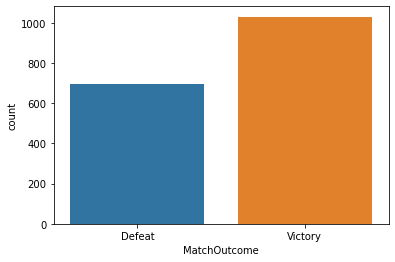

In [60]:
sns.countplot(data = dota_main_clean, x = 'MatchOutcome');

Not bad, but I think that this is a case where a pie chart would fit better, so let's try it.

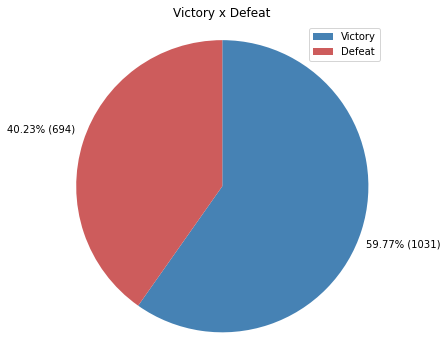

In [61]:
outcome = dota_main_clean['MatchOutcome'].value_counts()

plt.figure(figsize = (6,6))
plt.pie(outcome, startangle= 90, autopct = lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*(dota_main_clean.shape[0])), 
        pctdistance = 1.3, colors = ['steelblue', 'indianred'], counterclock = False)
plt.legend(['Victory', 'Defeat'], loc = 1)
plt.title('Victory x Defeat')
plt.axis('square');

Yeah! Almost 60% of win rate!

Now let's compare which game mode I usually play more.

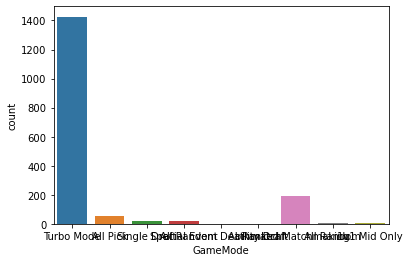

In [62]:
sns.countplot(data = dota_main_clean, x = "GameMode");

Hmmm, this is going to need some work.

In [63]:
#First I will create a list with the order that I desire for game mode

gamemode_list = ['None', 'All Pick', 'Captain"s Mode', 'Random Draft', 'Single Draft', 'All Random', 'Intro', 'Diretide', 
                 'Reverse Captain"s Mode', 'The Greeviling', 'Tutorial', 'Mid Only', 'Least Played', 'New Player Pool',
                 'Compendium Matchmaking', 'Co-op vs Bots', 'Captains Draft', 'Ability Draft', 'Special Event', 
                 'All Random Deathmatch', '1v1 Mid Only', 'Ranked Matchmaking', 'Turbo Mode']

In [64]:
#Now let's make this a categorical type

gameclasses = pd.api.types.CategoricalDtype(ordered = True, categories = gamemode_list)

In [65]:
#Now let's apply this to the GameMode column

dota_main_clean['GameMode'] = dota_main_clean['GameMode'].astype(gameclasses)

In [66]:
dota_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   MatchID            1725 non-null   int64          
 1   Duration           1725 non-null   timedelta64[ns]
 2   StartTime          1725 non-null   datetime64[ns] 
 3   GameMode           1725 non-null   category       
 4   MatchOutcome       1725 non-null   object         
 5   Hero               1725 non-null   object         
 6   Item1              1654 non-null   object         
 7   Item2              1638 non-null   object         
 8   Item3              1646 non-null   object         
 9   Item4              1534 non-null   object         
 10  Item5              1483 non-null   object         
 11  Item6              1323 non-null   object         
 12  Item7              505 non-null    object         
 13  Item8              269 non-null    object       

It seems it worked, now let's try it!

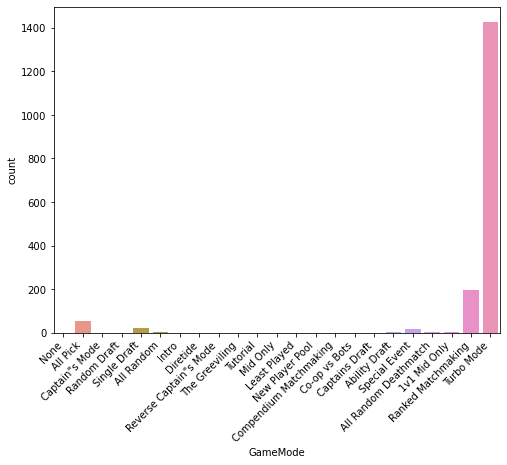

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(data = dota_main_clean, x = "GameMode")
plt.xticks(rotation = 45, horizontalalignment = 'right');

A little better but the scale isn't helping, let's change this too.

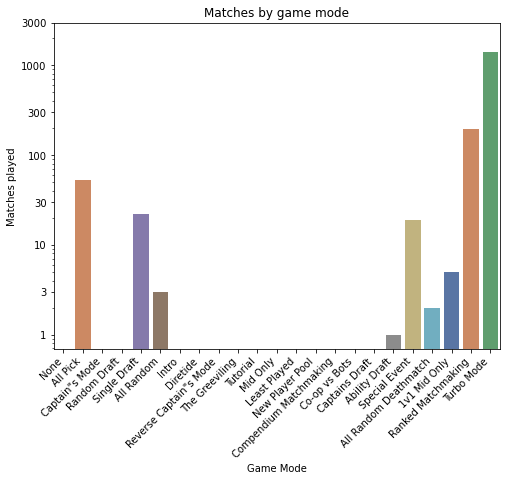

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(data = dota_main_clean, x = "GameMode", palette = 'deep')
plt.yscale('log')
plt.title('Matches by game mode')
plt.xlabel('Game Mode')
plt.ylabel('Matches played')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.yticks([1, 3, 10, 30, 100, 300, 1000, 3000], [1, 3, 10, 30, 100, 300, 1000, 3000]);

As I suspected I play a lot of turbo matches, I like this game mode, it is faster than a regular match, you gain more gold and experience, this allows you to buy more items.

In [69]:
turbo = dota_main_clean.query('GameMode == "Turbo Mode"')['Duration'].describe()
normal = dota_main_clean.query('GameMode == "Ranked Matchmaking"')['Duration'].describe()

print('The statistics for a turbo match are:\n\n {}\n\n and for a normal match are:\n\n{}'.format(turbo, normal))

The statistics for a turbo match are:

 count                      1426
mean     0 days 00:23:02.546984
std      0 days 00:08:17.623976
min             0 days 00:00:07
25%             0 days 00:18:46
50%      0 days 00:22:47.500000
75%      0 days 00:27:17.500000
max             0 days 00:58:21
Name: Duration, dtype: object

 and for a normal match are:

count                       194
mean     0 days 00:43:16.829896
std      0 days 00:10:49.136610
min             0 days 00:12:58
25%      0 days 00:35:56.250000
50%             0 days 00:42:46
75%      0 days 00:50:07.750000
max             0 days 01:13:55
Name: Duration, dtype: object


Above it is possible to see that an average *turbo* match lasts for approximately **23 minutes** while a *normal* match lasts for **43 minutes**.<br />
75% of the turbo matches played are below 27 minutes while for normal matches this number increase to 50 minutes. This is also one reason why I prefer turbo matches, it is possible to play more in less time.

One thing that I have always asked myself is which main attribute I usually choose. Let's find it out.

HeroMainAttribute
Agility         715
Intelligence    658
Strength        352
Name: HeroMainAttribute, dtype: int64


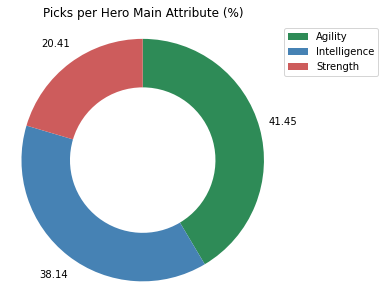

In [70]:
attribute = dota_main_clean.groupby('HeroMainAttribute')['HeroMainAttribute'].count()
print(attribute)

plt.figure(figsize= (5,5))
plt.pie(attribute, startangle = 90, autopct = '%1.2f', pctdistance = 1.2, colors = ['seagreen', 'steelblue', 'indianred'],
        counterclock = False, wedgeprops = {'width' : 0.4})
plt.title('Picks per Hero Main Attribute (%)')
plt.legend(['Agility', 'Intelligence', 'Strength'], bbox_to_anchor=(1.0, 1.0))
plt.axis('square');

That's interesting I have always thought that I picked more heroes with intelligence as the main attribute.

Let's now look to the distribution of levels.


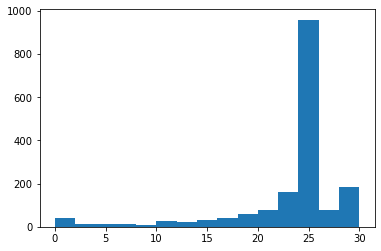

In [71]:
bins = np.arange(0, dota_main_clean['Level'].max() + 2, 2)

plt.hist(data = dota_main_clean , x = 'Level', bins = bins);

This seems about right, the histogram is left-skewed with the peak in level 25. From November 2019 Dota 2 released an update that allows to up your character until level 30. Since this is recent, I don't have so many values in level 30, but we can expect more values in the range 25~30 from now on.

Another thing that I was always curious about is whether XPPerMin, GoldPerMin, and NetWorth are somehow related to each other, let's find it out.

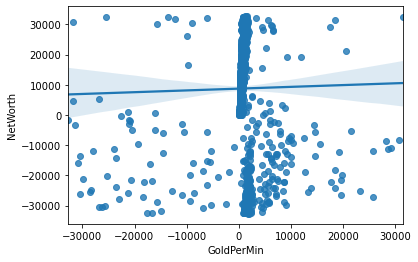

In [72]:
sns.regplot(data = dota_main_clean, x = 'GoldPerMin', y = 'NetWorth');

So, this didn't go as expected, looking at the data frame I realized that there are a lot of negative values for these parameters. Since I do not want to drop all these rows, I will just transform these negative values into positives.

In [73]:
dota_main_clean['GoldPerMin'] = dota_main_clean['GoldPerMin'].map(lambda x: int(math.sqrt((x**2))))
dota_main_clean['NetWorth'] = dota_main_clean['NetWorth'].map(lambda x: int(math.sqrt((x**2))))

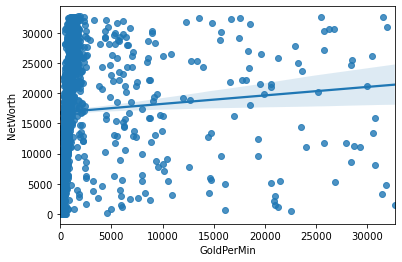

In [74]:
sns.regplot(data = dota_main_clean, x = 'GoldPerMin', y = 'NetWorth');

It seems better, the problem now it is that we have some extreme values with more than 5k of gold per min, this could happen when you are at high level and farm a lot of gold with creeps and kill many enemies (this will highly increase you gold per minute rate). But values above 10k of gold per minute are also not realistic, this is more likely an error when Steam's software got the information about the match, but as the other information is right, I don't want to drop all these rows, so let's limit the x-axis to 5k to have a more clear view.

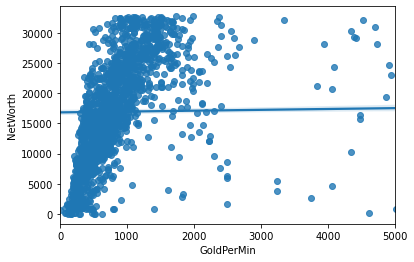

In [75]:
sns.regplot(data = dota_main_clean, x = 'GoldPerMin', y = 'NetWorth')
plt.xlim((0, 5000));

Still not good enough, let's try a different value.

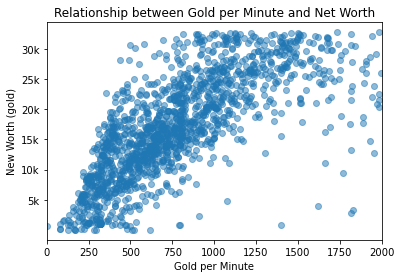

In [76]:
sns.regplot(data = dota_main_clean, x = 'GoldPerMin', y = 'NetWorth', x_jitter = 0.2, y_jitter = 0.2,
           scatter_kws = {'alpha': 0.5}, fit_reg = False)
plt.xlim((0, 2000))
plt.title('Relationship between Gold per Minute and Net Worth')
plt.xlabel('Gold per Minute')
plt.ylabel('New Worth (gold)')
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3], ['5k', '10k', '15k', '20k', '25k', '30k']);

Now it is better, I have added some jitter and transparency so we can visualize the chart better, it looks like that it is a linear relationship, the more you gold per minute rate the more your net worth (kinda obvious). Now let's do the same for GoldPerMin and XPPerMin. 

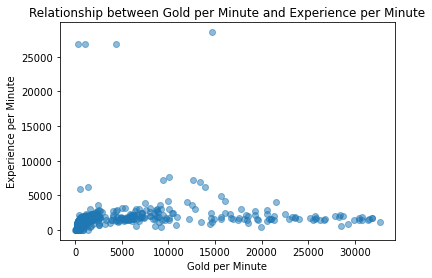

In [77]:
sns.regplot(data = dota_main_clean, x = 'GoldPerMin', y = 'XPPerMin', x_jitter = 0.2, y_jitter = 0.2,
           scatter_kws = {'alpha': 0.5}, fit_reg = False)
plt.title('Relationship between Gold per Minute and Experience per Minute')
plt.xlabel('Gold per Minute')
plt.ylabel('Experience per Minute');

It looks like we have the same problem here, some outliers for XPPerMin, we can see that most values fall under 5k of experience per minute. Let's use again some axis limits.

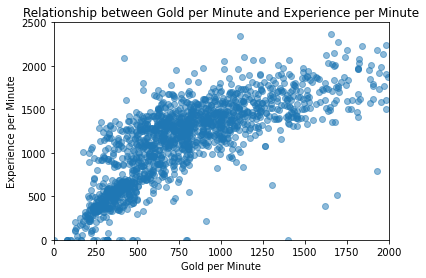

In [78]:
sns.regplot(data = dota_main_clean, x = 'GoldPerMin', y = 'XPPerMin', x_jitter = 0.2, y_jitter = 0.2,
           scatter_kws = {'alpha': 0.5}, fit_reg = False)
plt.xlim((0, 2000))
plt.ylim((0, 2500))
plt.title('Relationship between Gold per Minute and Experience per Minute')
plt.xlabel('Gold per Minute')
plt.ylabel('Experience per Minute');

Let's now find my win rate with each main attribute

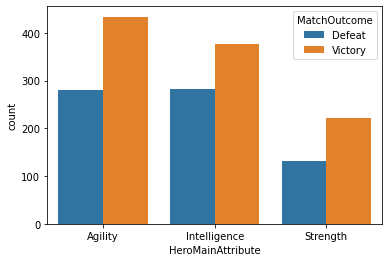

In [79]:
order = ['Agility', 'Intelligence', 'Strength']
sns.countplot(data = dota_main_clean, x = 'HeroMainAttribute', hue = 'MatchOutcome', order = order);

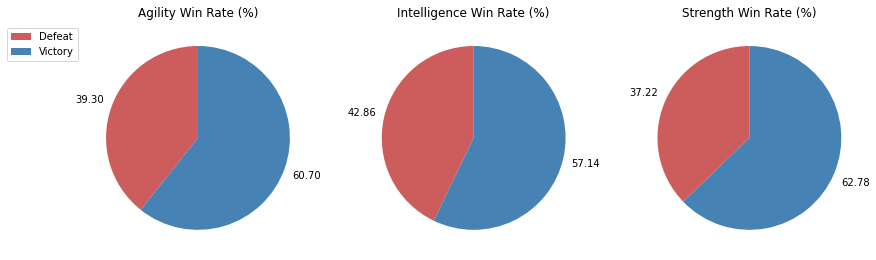

In [80]:
agility_winrate = dota_main_clean.query('HeroMainAttribute == "Agility"')
group_agility = agility_winrate.groupby('MatchOutcome')['MatchOutcome'].count()

intelligence_winrate = dota_main_clean.query('HeroMainAttribute == "Intelligence"')
group_intelligence = intelligence_winrate.groupby('MatchOutcome')['MatchOutcome'].count()

strength_winrate = dota_main_clean.query('HeroMainAttribute == "Strength"')
group_strength = strength_winrate.groupby('MatchOutcome')['MatchOutcome'].count()

plt.figure(figsize = (14,14))

plt.subplot(1,3,1)
plt.pie(group_agility, autopct = '%1.2f', pctdistance = 1.25, startangle = 90, counterclock = True, 
        colors = ['indianred', 'steelblue'])
plt.title('Agility Win Rate (%)')
plt.legend(['Defeat', 'Victory'], bbox_to_anchor=(0,1))

plt.subplot(1,3,2)
plt.pie(group_intelligence, autopct = '%1.2f', pctdistance = 1.25, startangle = 90, counterclock = True, 
        colors = ['indianred', 'steelblue'])
plt.title('Intelligence Win Rate (%)')


plt.subplot(1,3,3)
plt.pie(group_strength, autopct = '%1.2f', pctdistance = 1.25, startangle = 90, counterclock = True, 
        colors = ['indianred', 'steelblue'])
plt.title('Strength Win Rate (%)');

Interesting! As we saw above I usually tend to not choose heroes with strength as the main attribute, but surprisingly I have a higher win rate with strength heroes. Time to review some choices.

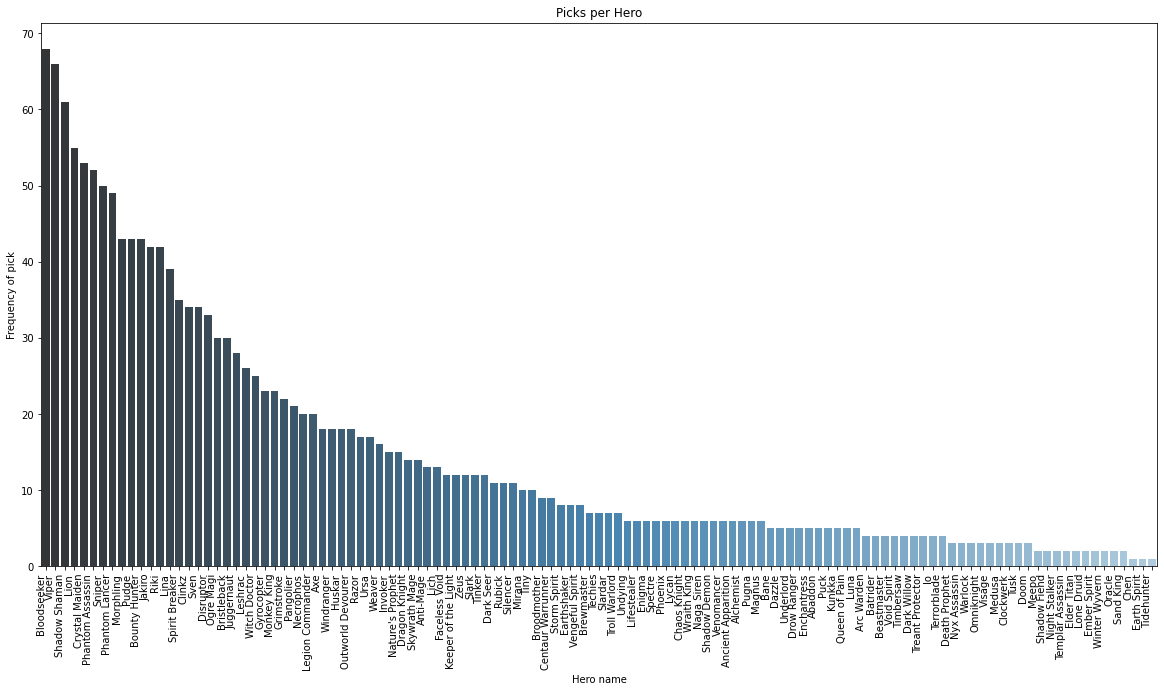

In [81]:
heroes_order = dota_main_clean.groupby('Hero')['Hero'].count().sort_values(ascending = False).index
palette_horoes = sns.color_palette('Blues_d', 119)

plt.figure(figsize = (20,10))
sns.countplot(data = dota_main_clean, x = 'Hero', order = heroes_order, palette = palette_horoes)
plt.xticks(rotation = 90, horizontalalignment = 'right')
plt.title('Picks per Hero')
plt.xlabel('Hero name')
plt.ylabel('Frequency of pick');

Today Dota 2 has 119 heroes, because of this the chart above became very crowded. Let's make a chart with only half of the heroes. *(When I took a better look at this chart for the first time, I noticed something funny, there were two heroes with a number instead of a name, they were '-127' and '-128', so I just went back to the wrangling part and dropped these rows)*

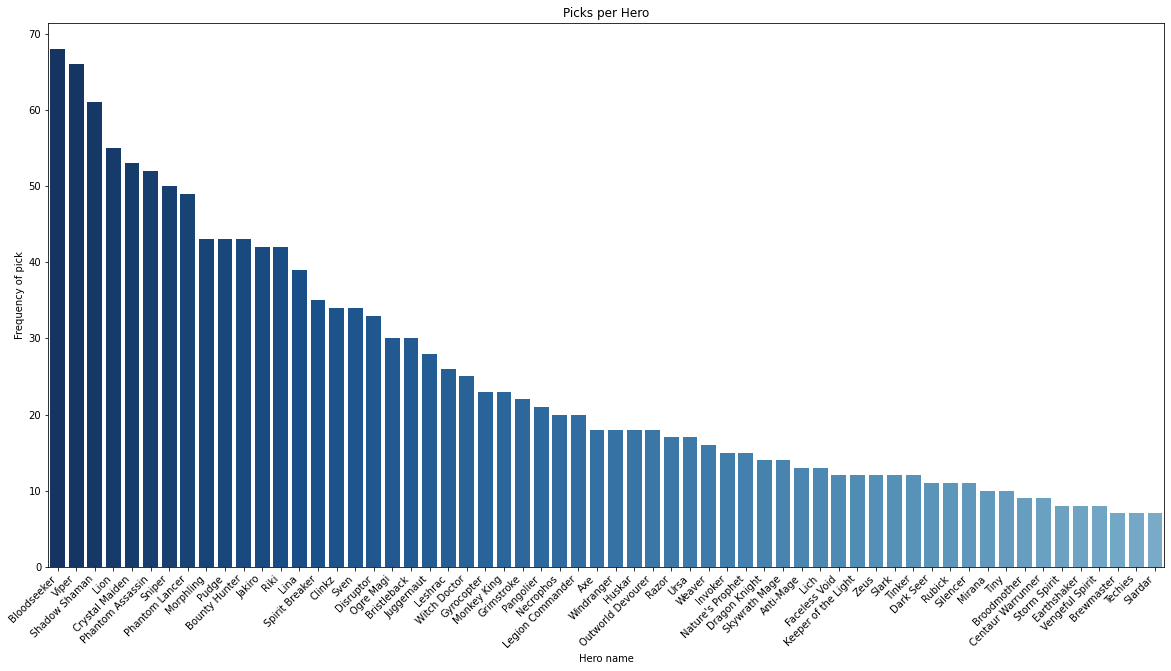

In [82]:
heroes_order2 = dota_main_clean.groupby('Hero')['Hero'].count().sort_values(ascending = False)[:60].index
palette_horoes = sns.color_palette('Blues_r', 119)

plt.figure(figsize = (20,10))
sns.countplot(data = dota_main_clean, x = 'Hero', order = heroes_order2, palette = palette_horoes)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.title('Picks per Hero')
plt.xlabel('Hero name')
plt.ylabel('Frequency of pick');


Now we can clearly see which are my preferred choices for heroes.

Now I want to find out how much I've been playing throughout these years. In order to do this I am going to create a subset from the main dataframe.

In [83]:
dota_sub = dota_main_clean[['StartTime']]

In [84]:
dota_sub = dota_sub.set_index(pd.DatetimeIndex(dota_sub['StartTime']))

In [85]:
matches_pleyed = dota_sub.resample('M').apply({'StartTime':'count'})

In [86]:
fig = px.line(matches_pleyed)

fig.update_xaxes(rangeslider_visible = True, rangeselector = 
                 dict(buttons = list([dict(count=1, label="1m", step="month", stepmode="backward"),
                                      dict(count=6, label="6m", step="month", stepmode="backward"),
                                      dict(count=1, label="1y", step="year", stepmode="backward"),
                                      dict(step="all")])))

fig.update_layout(title= {'text' : 'Matches Played Over the Years',
                          'x' : 0.5,
                          'y' : 0.95},
                  xaxis_title = 'Date',
                  yaxis_title = 'Matches played',
                  showlegend = False)
fig.show()

Nice! I now have a history of games played per month. It is nice to see that my playing is kind cyclic.

Let's see how much time I spent on this game.

In [87]:
time_spent = '{:.2f}'.format(dota_main_clean['Duration'].sum() / np.timedelta64(1,'h'))

print('Wow! I spent ' + time_spent + ' hours at this game!')

Wow! I spent 742.29 hours at this game!



Now I want to compare how my playing is according to the main attribute, in this case, I will compare the number of kills and deaths per the main attribute.

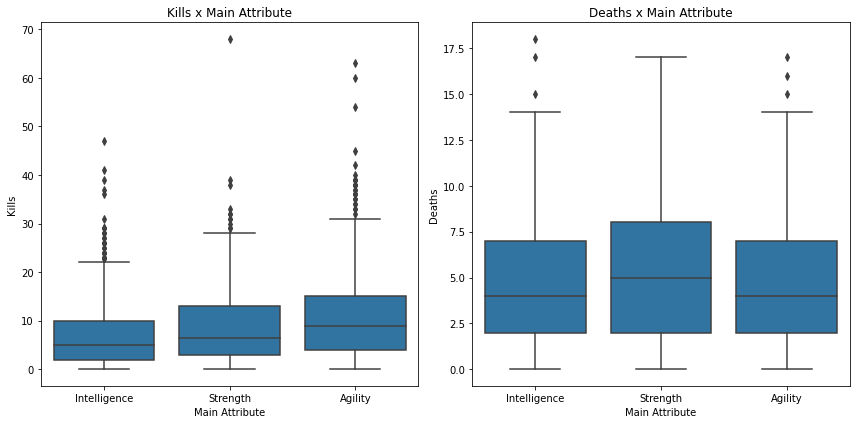

In [88]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(data = dota_main_clean, x = 'HeroMainAttribute', y = 'Kills', color = sns.color_palette()[0])
plt.title('Kills x Main Attribute')
plt.xlabel('Main Attribute')

plt.subplot(122)
sns.boxplot(data = dota_main_clean, x = 'HeroMainAttribute', y = 'Deaths', color = sns.color_palette()[0])
plt.title('Deaths x Main Attribute')
plt.xlabel('Main Attribute')
plt.tight_layout();

Interestingly, as it is possible to see in the charts above I tend to kill more enemies when I am playing with an agility hero. For the deaths chart, agility and intelligence are almost identical.

Let's take an overall look.

In [89]:
kill_overall = dota_main_clean['Kills'].sum()
deaths_overall = dota_main_clean['Deaths'].sum()

overall = pd.DataFrame({'Overall': pd.Series(data = [kill_overall, deaths_overall], index = ['Kills', 'Deaths'])})

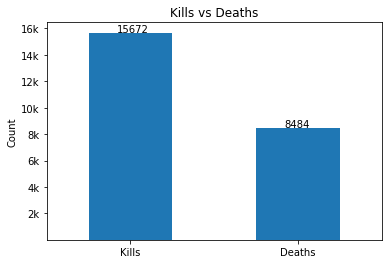

In [90]:
overall.plot(kind = 'bar', legend = None)
plt.title('Kills vs Deaths')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.yticks([2e3, 4e3, 6e3, 8e3, 10e3, 12e3, 14e3, 16e3], ['2k', '4k', '6k', '8k', '10k', '12k', '14k', '16k'])

plt.text(x = -0.08, y = 15700, s = overall['Overall'][0])
plt.text(x = 0.92, y = 8500, s = overall['Overall'][1]);

Good overall score! Almost two times more kills than deaths.

Now let's look at the second data set *dota_side_clean*, this data set has fewer observations, I think this is probably because it is a new feature in Valve's website, as it has started to store information only from 2020-04-15.
Let's see how this data frame looks like.

In [91]:
dota_side_clean = pd.read_csv(r'D:\Guilherme\Cursos\Programação\Curso Cientista de Dados - Udemy\5º Projeto\Projeto\dota_side_clean.csv')
dota_side_clean

MatchID  HeroDamage  TowerDamage  HeroHealing  HeroPickOrder  \
0    5482821199       26368          976         9120              3   
1    5482726054        8006          719            0              9   
2    5482696084       37842         9736            0              9   
3    5482674016       18640          540            0              9   
4    5482387329       18652        11275            0              7   
..          ...         ...          ...          ...            ...   
335  5358284943       20931         4016            0              7   
336  5358253728       16111           24            0              2   
337  5358222083       10780            0            0              9   
338  5358181914        7742         1407            0             10   
339  5358154694       27061         9202            0              4   

     SafeLane  OffLane  MidLane  Jungle  Roam  
0           1        0        0       0     0  
1           1        0        0       0     0  
2           1        0        0       0     0  
3           0        0        1       0     0  
4           0        0        1       0     0  
..        ...      ...      ...     ...   ...  
335         0        1        0       0     0  
336         1        0        0       0     0  
337         1        0        0       0     0  
338         1        0        0       0     0  
339         1        0        0       0     0  

[340 rows x 10 columns]

This data set contains some cool information like HeroDamage (the damage I did to other heroes), Tower Damage (the damage I did to the enemy's tower), Hero Healing (how much I have healed the heroes of my team), Hero Pick Order (this is the order in which I picked my hero, first, second, third, and so on) and the lanes that I played the most, Dota 2 has three main lanes (safe lane, mid lane and off lane), jungle is when a hero stay more in the jungle killing creeps to gain level rather than in one of the three main lanes, roam is when a hero keeps roaming between lanes.

Let's first take a look at the hero and tower damage and hero healing.

In [92]:
hero_damage = dota_side_clean['HeroDamage'].sum()
tower_damage = dota_side_clean['TowerDamage'].sum()
hero_healing = dota_side_clean['HeroHealing'].sum()

hero_statistics = pd.DataFrame({'Statistics': pd.Series(data = [hero_damage, tower_damage, hero_healing], 
                                                        index = ['Hero Damage', 'Tower Damage', 'Hero Healing'])})

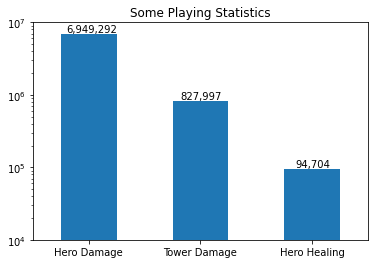

In [93]:
hero_statistics.plot(kind = 'bar', legend = None)
plt.title('Some Playing Statistics')
plt.xticks(rotation = 0)
plt.yscale('log')
plt.yticks([1e4, 1e5, 1e6, 1e7])
plt.text(x = -0.2, y = hero_damage + 400000, s = '{:,}'.format(hero_statistics['Statistics'][0]))
plt.text(x = 0.82, y = tower_damage + 50000, s = '{:,}'.format(hero_statistics['Statistics'][1]))
plt.text(x = 1.85, y = hero_healing + 5000, s = '{:,}'.format(hero_statistics['Statistics'][2]));

The chart above is very interesting because I can see that I prefer to go on team fights rather than destroy enemy towers or play as a support for healing allies.

Let's now analyze whether I tend to be one of the first to pick a hero or not.

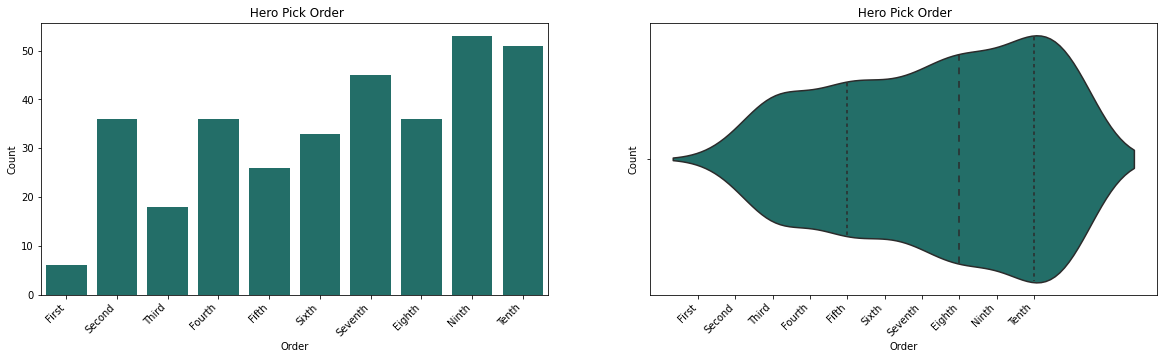

In [94]:
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sns.countplot(data = dota_side_clean, x = 'HeroPickOrder', color = sns.color_palette('BrBG')[5])
plt.title(' Hero Pick Order')
plt.xlabel('Order')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth',
                                             'Ninth', 'Tenth'], rotation = 45, horizontalalignment = 'right');
plt.subplot(1, 2, 2)
sns.violinplot(data = dota_side_clean, x = 'HeroPickOrder', color = sns.color_palette('BrBG')[5], inner = 'quartile')
plt.title(' Hero Pick Order')
plt.xlabel('Order')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth',
                                             'Ninth', 'Tenth'], rotation = 45, horizontalalignment = 'right');

As I suspected! I usually take a long time to choose which hero I will play with. We can see in the violin chart that 75% of my pick order is after the fifth pick.

Now, finally, let's see which lanes I usually play the most.

In [95]:
safe = dota_side_clean['SafeLane'].sum()
off = dota_side_clean['OffLane'].sum()
mid = dota_side_clean['MidLane'].sum()
jungle = dota_side_clean['Jungle'].sum()
roam = dota_side_clean['Roam'].sum()

In [96]:
roles_df = pd.DataFrame(dict(r=[safe, off, mid, jungle, roam],
                             theta=['Safe Lane', 'Off Lane', 'Mid Lane', 'Jungle', 'Roam']))

In [97]:
fig = px.line_polar(roles_df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(title = {'text':'Radar chart Lane Preference',
                           'x' : 0.5,
                           'y' : 1})
fig.show()

As we can see in the chart above, I usually prefer to play in the safe lane or off lane. I don't have the habit of playing in the jungle or be a roamer.